

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction

<br>
I have selected the <b>TMDb Movie Dataset</b> for this project and we will be looking for 
 <ol><li>Total Revenue Genrated in each year and highest among all </li>
     <li>Total Budget in each year and highest among all</li>
     <li>Total Movies released in each year and highest among all</li>
     <li>Average movie ratings for every year</li>
     <li>Top 10 most earning movies of all time</li>
 </ol>
 Also we will visualize the data
<br>
In this project,we will be using all of the movies from the dataset from 1960 to 2015.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_data=pd.read_csv('tmdb-movies.csv')
print("Some of the data in DataFrame")
movie_data.head(3)

Some of the data in DataFrame


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
#To see no. of movies and no. of columns/attributes
movie_data.shape

(10866, 21)

From above we result,there are 10866 movies with 21 attributes as columns

In [4]:
#Checking information(datatype of columns) of Dataframe
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#To find the indexes/column or attribute of the movie present in the dataset
column_indexes = list(movie_data.columns)
column_indexes

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [6]:
#To find the number of NA values in each column
movie_data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There is presence of NA values in columns which need to be either fixed or removed

In [7]:
#To find number of unique entries in each column
movie_data.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
# To find number of duplicate rows
movie_data.duplicated().sum()

1

There is one duplicated row which needs to be dropped



### Data Cleaning 

In this phase we are removing duplicate data entries in dataset and keeping only needed information for analysis

In [9]:
#To drop duplicate entries from the dataset
movie_data.drop_duplicates(inplace = True)

In [10]:
#To see the changes in dataset
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
cols_to_be_dropped=['imdb_id','cast','director','genres','homepage','director','overview','tagline','keywords','production_companies']
movie_data.drop( columns=cols_to_be_dropped,inplace=True)


Since,we are doing analysis only for certain data column so its better to remove inaccurate or irrelevant parts of the data which save our time and make it convenient to fix errors
<Br>
So,we are dropping some columns which are not required for our analysis or may rise error  in future 

In [12]:
movie_data.head(1)

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


Now,columns which were not required are dropped

In [13]:
movie_data.shape

(10865, 12)

In [14]:
#Checking whether we are still left with some incompleteness or not
movie_data.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

At this stage,our data seems to be all cleaned but still there might exist some incompletenes so lets check it one more time

In [15]:
#To find stastistics form the dataset
round(movie_data.describe(),2)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.00,10865.00,1.086500e+04,1.086500e+04,10865.00,10865.00,10865.00,10865.00,1.086500e+04,1.086500e+04
mean,66066.37,0.65,1.462429e+07,3.982690e+07,102.07,217.40,5.98,2001.32,1.754989e+07,5.136900e+07
std,92134.09,1.00,3.091428e+07,1.170083e+08,31.38,575.64,0.94,12.81,3.430753e+07,1.446383e+08
min,5.00,0.00,0.000000e+00,0.000000e+00,0.00,10.00,1.50,1960.00,0.000000e+00,0.000000e+00
25%,10596.00,0.21,0.000000e+00,0.000000e+00,90.00,17.00,5.40,1995.00,0.000000e+00,0.000000e+00
50%,20662.00,0.38,0.000000e+00,0.000000e+00,99.00,38.00,6.00,2006.00,0.000000e+00,0.000000e+00
75%,75612.00,0.71,1.500000e+07,2.400000e+07,111.00,146.00,6.60,2011.00,2.085325e+07,3.370173e+07
max,417859.00,32.99,4.250000e+08,2.781506e+09,900.00,9767.00,9.20,2015.00,4.250000e+08,2.827124e+09


From above statistics for some column we can see minimum value is zero for some column it is possible but in reality there can be no movies with 0 budget and 0 revenue.
<br>
So,we will replace the values of 0 in budget and revenue with null value in budget and revenue column

In [16]:
movie_data['budget'] = movie_data['budget'].replace(0,np.nan)
movie_data['revenue'] = movie_data['revenue'].replace(0,np.nan)

In [17]:
#To see updated stastistics form the dataset
round(movie_data.describe(),2)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.00,10865.00,5.169000e+03,4.849000e+03,10865.00,10865.00,10865.00,10865.00,1.086500e+04,1.086500e+04
mean,66066.37,0.65,3.073958e+07,8.923886e+07,102.07,217.40,5.98,2001.32,1.754989e+07,5.136900e+07
std,92134.09,1.00,3.890441e+07,1.620801e+08,31.38,575.64,0.94,12.81,3.430753e+07,1.446383e+08
min,5.00,0.00,1.000000e+00,2.000000e+00,0.00,10.00,1.50,1960.00,0.000000e+00,0.000000e+00
25%,10596.00,0.21,6.000000e+06,7.732325e+06,90.00,17.00,5.40,1995.00,0.000000e+00,0.000000e+00
50%,20662.00,0.38,1.700000e+07,3.185308e+07,99.00,38.00,6.00,2006.00,0.000000e+00,0.000000e+00
75%,75612.00,0.71,4.000000e+07,9.996575e+07,111.00,146.00,6.60,2011.00,2.085325e+07,3.370173e+07
max,417859.00,32.99,4.250000e+08,2.781506e+09,900.00,9767.00,9.20,2015.00,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis'



Exploring our data in columns with the help of one dimensional visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE2C44D828>,
      dtype=object)

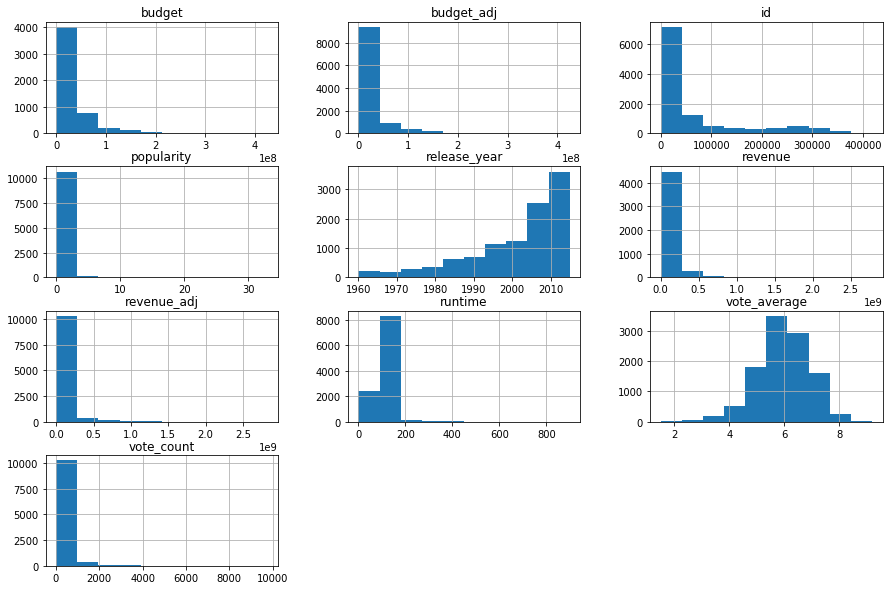

In [20]:
#creating histogram for different columns
movie_data.hist(figsize=(15,10))


### Research Question 1:Finding the Highest Movie Revenue Grossing Year
<br>
The first thing I wanted to do was find the highest grossing months for movies. I wanted to look at the total amount of money that each month made - as well as the average revenue for movies in each month.

In [21]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# Finding the total revenue generated in a year

revenue_by_year = movie_data.groupby(['release_year']).sum()['revenue'] 
revenue_by_year

release_year
1960    1.450050e+08
1961    3.377202e+08
1962    2.155798e+08
1963    1.874050e+08
1964    3.409818e+08
1965    4.580819e+08
1966    8.473669e+07
1967    7.378346e+08
1968    2.647330e+08
1969    2.439571e+08
1970    5.602220e+08
1971    4.049106e+08
1972    4.947302e+08
1973    1.223981e+09
1974    8.125398e+08
1975    9.574900e+08
1976    8.010056e+08
1977    2.180583e+09
1978    1.369780e+09
1979    1.684795e+09
1980    1.768662e+09
1981    1.774606e+09
1982    2.458444e+09
1983    2.307529e+09
1984    2.635524e+09
1985    2.875772e+09
1986    3.002778e+09
1987    3.462105e+09
1988    3.739551e+09
1989    5.164924e+09
1990    5.315167e+09
1991    4.706600e+09
1992    6.078153e+09
1993    6.955151e+09
1994    7.095429e+09
1995    9.156341e+09
1996    8.311492e+09
1997    1.065517e+10
1998    9.493175e+09
1999    1.135571e+10
2000    1.097870e+10
2001    1.341008e+10
2002    1.464362e+10
2003    1.513824e+10
2004    1.679382e+10
2005    1.651684e+10
2006    1.627574e+10


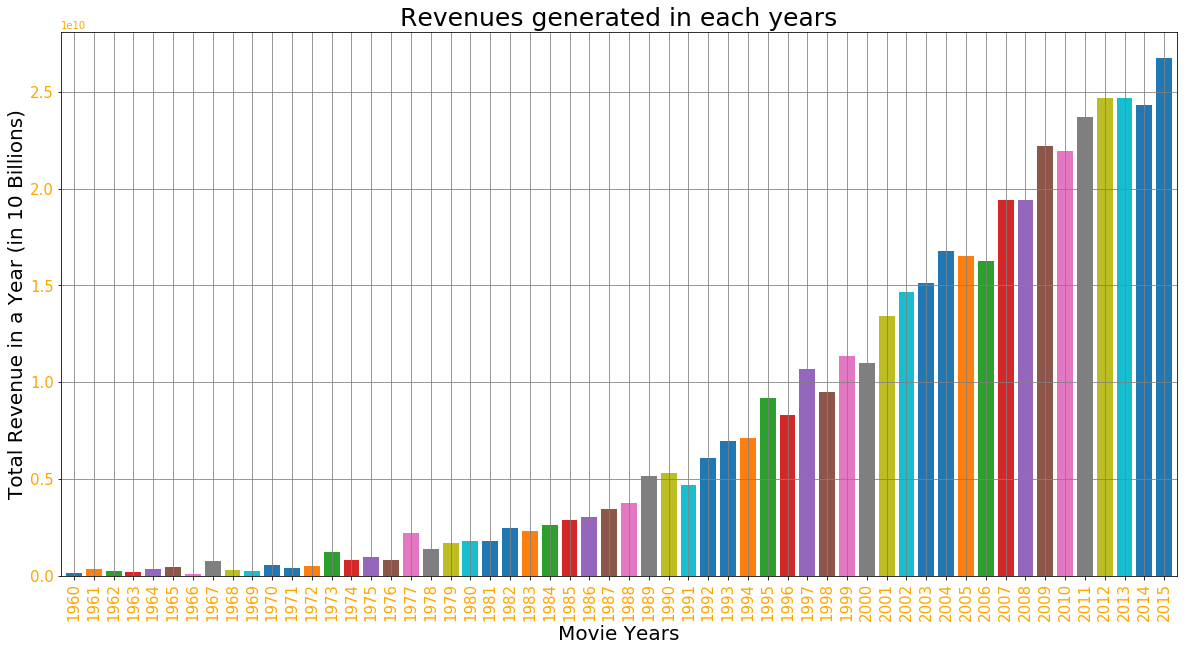

In [22]:
ax=plt.subplot()
revenue_by_year.plot.bar(figsize=(20,10),grid=True,width=0.8)
plt.title("Revenues generated in each years",size=25)
plt.xlabel("Movie Years",size=20)
plt.ylabel("Total Revenue in a Year (in 10 Billions)",size=20)
ax.tick_params(labelsize=15,labelcolor='orange',grid_color='grey')

In [23]:
print("The Highest movie revenue is {:,.2f} in year {}".format(revenue_by_year.max(),revenue_by_year.idxmax()))

The Highest movie revenue is 26,762,450,518.00 in year 2015


Text(0.5,1,"Revenue's Histogram")

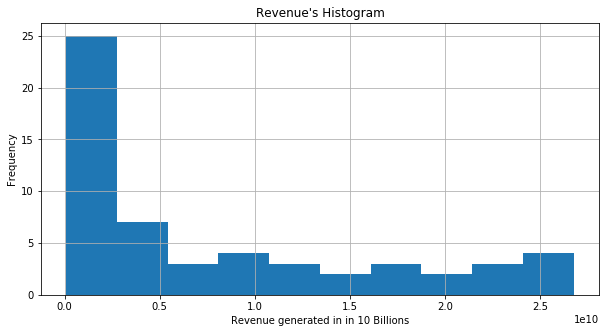

In [24]:
#one dimensional visualization of Revenues
revenue_by_year.hist(figsize=(10,5))
plt.xlabel("Revenue generated in in 10 Billions")
plt.ylabel("Frequency")
plt.title("Revenue's Histogram")

### Research Question 2:Finding the Highest Movie Budget in a Year

In [25]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
budget_by_year = movie_data.groupby(['release_year']).sum()['budget'] 
budget_by_year

release_year
1960    2.205695e+07
1961    4.613700e+07
1962    5.472213e+07
1963    7.333150e+07
1964    3.948316e+07
1965    7.020512e+07
1966    5.755480e+07
1967    1.006522e+08
1968    7.193900e+07
1969    4.212909e+07
1970    1.269669e+08
1971    7.599700e+07
1972    3.627925e+07
1973    6.519078e+07
1974    7.697000e+07
1975    5.627900e+07
1976    1.221500e+08
1977    1.615800e+08
1978    2.089970e+08
1979    2.548140e+08
1980    3.625000e+08
1981    3.737578e+08
1982    4.377950e+08
1983    5.191074e+08
1984    7.292120e+08
1985    7.487206e+08
1986    7.045336e+08
1987    7.094558e+08
1988    9.253480e+08
1989    1.079656e+09
1990    1.289922e+09
1991    1.466233e+09
1992    1.441765e+09
1993    1.779629e+09
1994    2.229207e+09
1995    2.865884e+09
1996    3.687042e+09
1997    4.751087e+09
1998    4.499660e+09
1999    5.765235e+09
2000    5.752700e+09
2001    5.641944e+09
2002    5.894640e+09
2003    6.239858e+09
2004    7.170340e+09
2005    7.343284e+09
2006    7.306185e+09


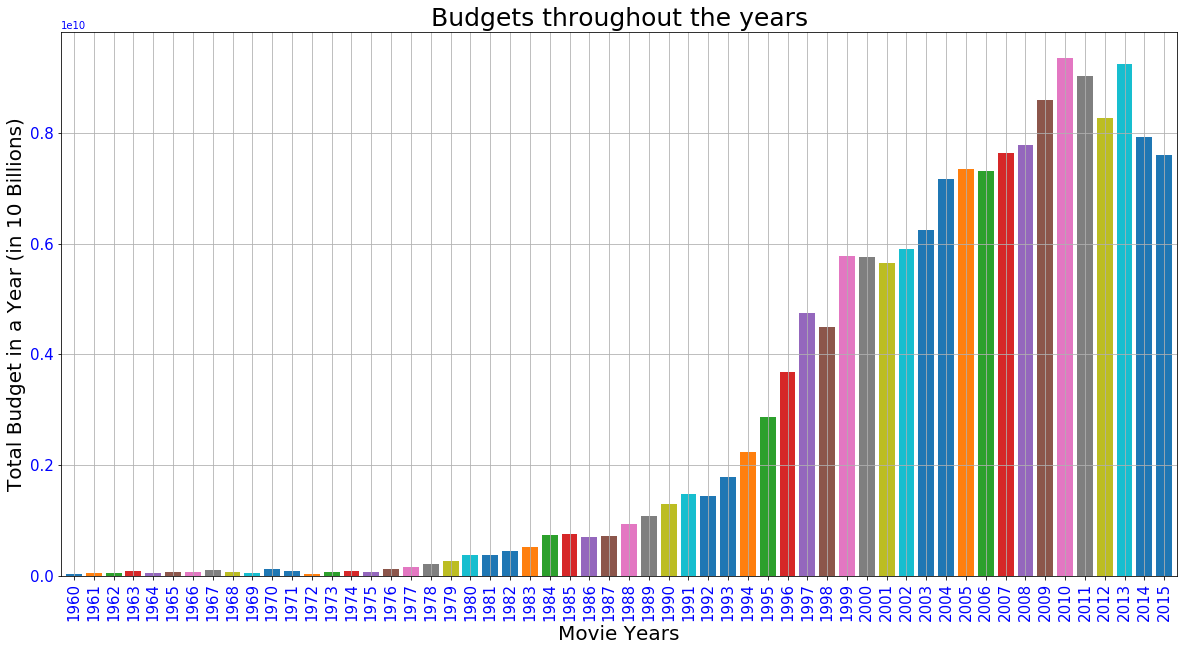

In [26]:
ax=plt.subplot()
budget_by_year.plot.bar(figsize=(20,10),grid=True,width=0.8)
plt.title("Budgets throughout the years",size=25)
plt.xlabel("Movie Years",size=20)
plt.ylabel("Total Budget in a Year (in 10 Billions)",size=20)
ax.tick_params(labelsize=15,labelcolor='blue')

In [27]:
print("The Highest movie budget is {:,.2f} in year {}".format(budget_by_year.max(),budget_by_year.idxmax()))

The Highest movie budget is 9,355,001,006.00 in year 2010


Text(0.5,1,"Budget's Histogram")

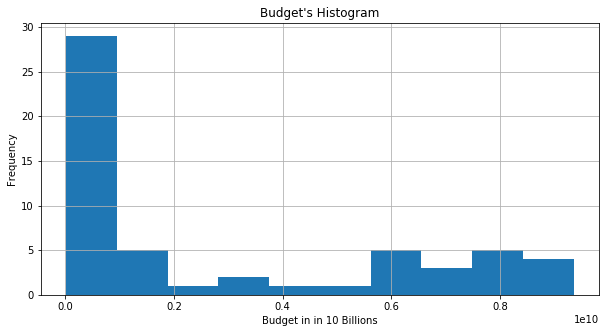

In [30]:
#one dimensional visualization of budgets
budget_by_year.hist(figsize=(10,5))
plt.xlabel("Budget in in 10 Billions")
plt.ylabel("Frequency")
plt.title("Budget's Histogram")

### Research Question 3:Finding the Year in which most movies were released

In [31]:
number_of_movies_by_year = movie_data.groupby(['release_year']).count()['id']
number_of_movies_by_year

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

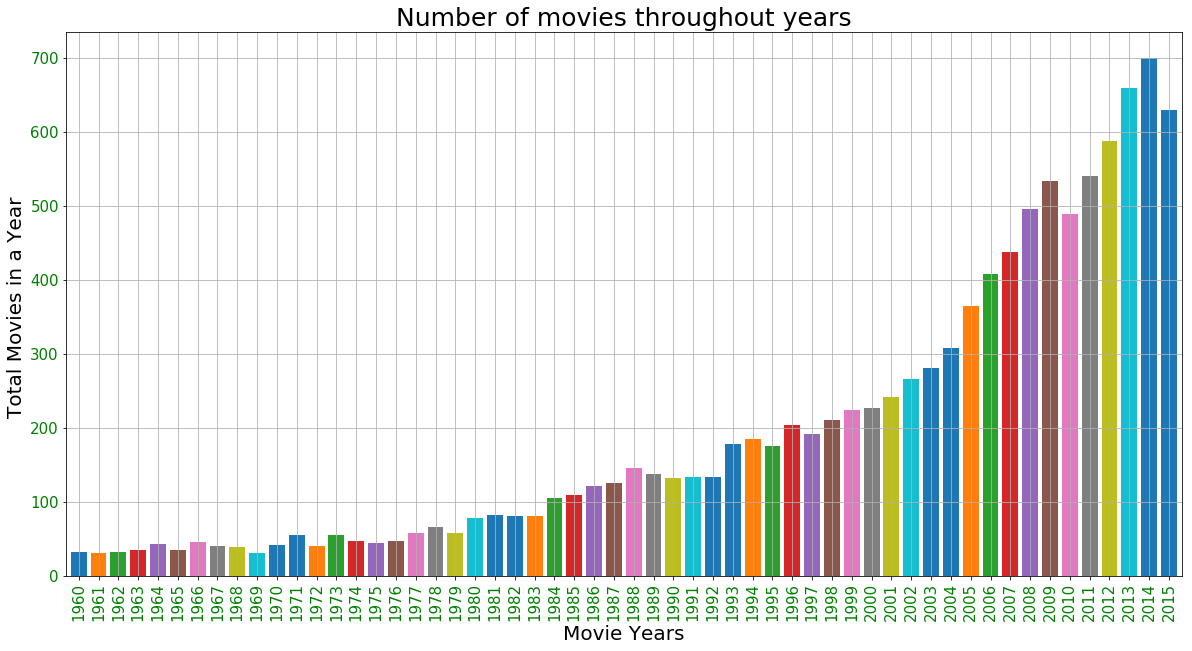

In [32]:
ax=plt.subplot()
number_of_movies_by_year.plot.bar(figsize=(20,10),grid=True,width=0.8)
plt.title("Number of movies throughout years",size=25)
plt.xlabel("Movie Years",size=20)
plt.ylabel("Total Movies in a Year ",size=20)
ax.tick_params(labelsize=15,labelcolor='green')

In [33]:
print("The Highest number of movies released in a year is {} in year {}".format(number_of_movies_by_year.max() \
                                                                     ,number_of_movies_by_year.idxmax()))

The Highest number of movies released in a year is 700 in year 2014


### Research Question 4:Finding the average ratings of the movies released in the year

In [34]:
average_ratings_by_year = round(movie_data.groupby(['release_year']).mean()['vote_average'],2)
average_ratings_by_year

release_year
1960    6.32
1961    6.37
1962    6.34
1963    6.33
1964    6.21
1965    6.19
1966    6.13
1967    6.24
1968    6.38
1969    5.96
1970    6.42
1971    6.42
1972    6.53
1973    6.70
1974    6.40
1975    6.39
1976    6.34
1977    6.15
1978    6.13
1979    6.31
1980    6.16
1981    6.17
1982    6.24
1983    5.97
1984    6.00
1985    6.18
1986    6.00
1987    6.13
1988    5.97
1989    6.07
1990    5.99
1991    6.01
1992    6.08
1993    6.05
1994    5.94
1995    6.06
1996    5.90
1997    5.99
1998    5.97
1999    6.03
2000    5.88
2001    5.90
2002    5.97
2003    5.93
2004    5.99
2005    5.87
2006    5.94
2007    5.96
2008    5.93
2009    5.86
2010    5.99
2011    5.96
2012    5.80
2013    5.88
2014    5.92
2015    5.89
Name: vote_average, dtype: float64

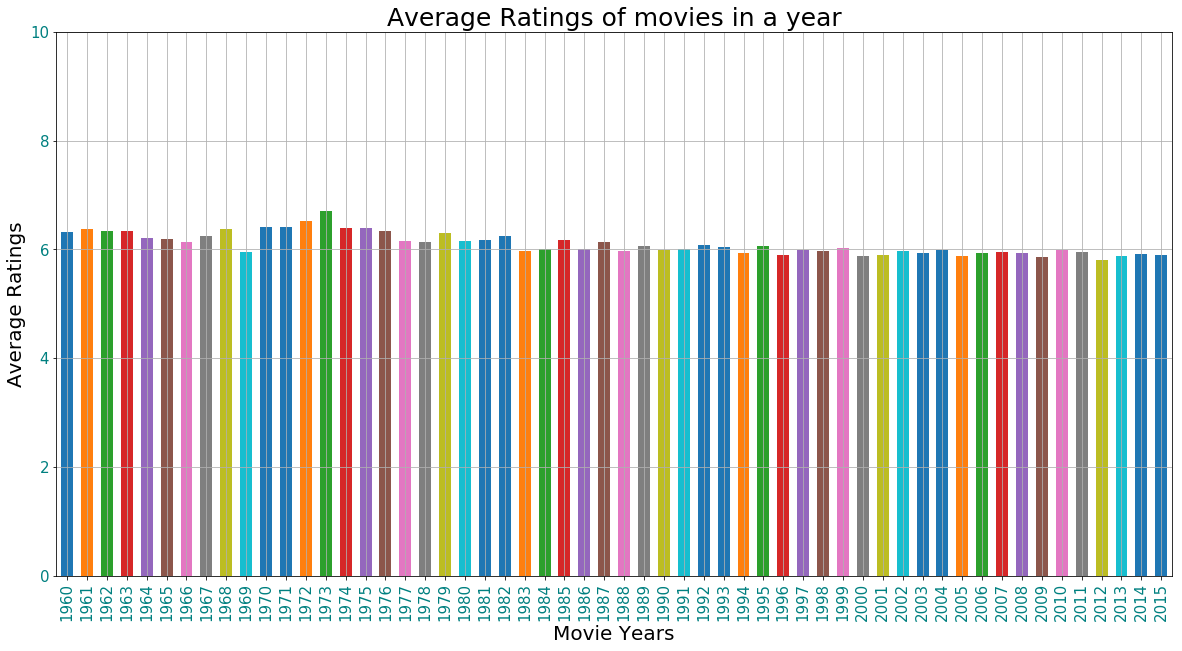

In [35]:
ax=plt.subplot()
average_ratings_by_year.plot.bar(figsize=(20,10),grid=True,width=0.6)
plt.title("Average Ratings of movies in a year",size=25)
plt.xlabel("Movie Years",size=20)
plt.ylabel("Average Ratings",size=20)
plt.ylim(0,10,1)
ax.tick_params(labelsize=15,labelcolor='teal')

In [36]:
print("The Highest Average ratings of movies in a year is {} in year {}".format(average_ratings_by_year.max() \
                                                                     ,average_ratings_by_year.idxmax()))

The Highest Average ratings of movies in a year is 6.7 in year 1973


### Research Question 5:Top 10 most earning movies of all time

In [37]:
profit=movie_data.groupby('original_title').sum()["revenue"]-movie_data.groupby("original_title").sum()["budget"]
#to find 10 largest profits
top10_movies=profit.nlargest(10)
top10_movies

original_title
Avatar                                          2.544506e+09
Star Wars: The Force Awakens                    1.868178e+09
Titanic                                         1.632034e+09
Jurassic World                                  1.363529e+09
Furious 7                                       1.316249e+09
The Avengers                                    1.288081e+09
Harry Potter and the Deathly Hallows: Part 2    1.202818e+09
Frozen                                          1.127285e+09
Avengers: Age of Ultron                         1.125036e+09
The Net                                         1.084280e+09
dtype: float64

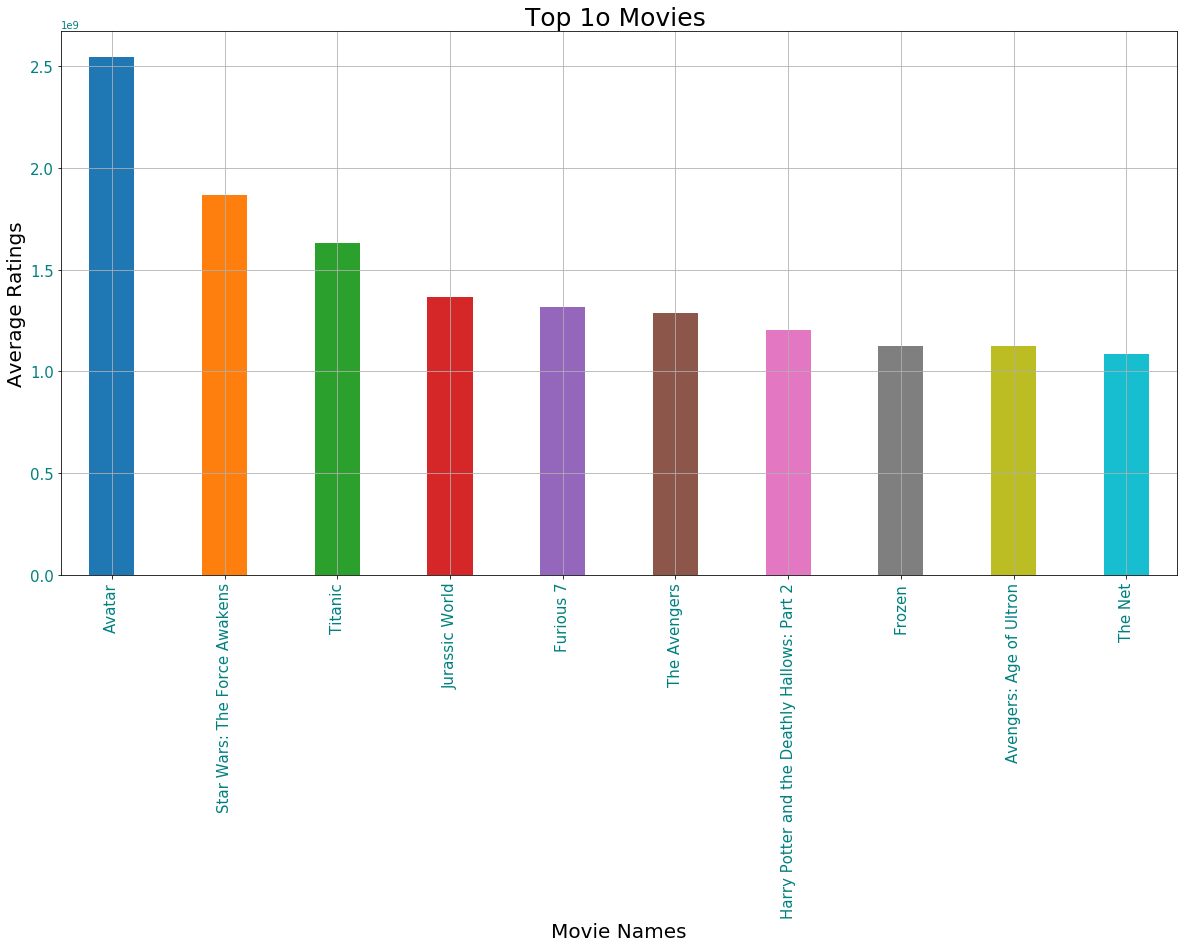

In [38]:
ax=plt.subplot()
top10_movies.plot.bar(figsize=(20,10),grid=True,width=0.4)
plt.title("Top 1o Movies ",size=25)
plt.xlabel("Movie Names",size=20)
plt.ylabel("Average Ratings",size=20)
ax.tick_params(labelsize=15,labelcolor='teal')

<a id='conclusions'></a>
## Conclusions
<br>
<ul>
<li>From data and visualization for "Revenues generated each years" we found that The Highest movie revenue is 26,762,450,518.00 in year 2015 and it seems like revenue keeps on increasing with the year which is a correlation here but it does not imply causation as in some points the revenue at that point is greater than the next point</li>
<br>
    <li>
From data and visualization for "Budgets throughout years" we found that The Highest movie budget is 9,355,001,006.00 in year 2010 and it seems with the year the budget is also increasing so we can say budgets and years have corelation but it does nor necessarily imply causation</li>
<br>
<li>
From data and visualization for "Number of movies throughout years" we found that  The Highest number of movies released in a year is 700 in year 2014 and we can see with the time number of movies in ayear increases which signifies number of movies have some correlation with year but it doesn't imply causation because increase is not exponential as it is decreasing in some points
</li>
<br>
<li>
From data and visualization for "Average Ratings of movie in a year" we found that The Highest Average ratings of movies in a year is 6.7 in year 1973 as we know average rating depends on vote given by users so it has no correlation with years 
</li>
<br>
<li>
From data and visualization for "Top 10 Movies of all time" we found that Top 10 movies are:
<ol>
<li>Avatar</li>                                        
<li>Star Wars: The Force Awakens</li>                 
<li>Titanic</li><br>
<li>Jurassic World</li>                           
<li>Furious 7</li>                                      
<li>The Avengers</li><br>
<li>Harry Potter and the Deathly Hallows: Part 2 </li>   
<li>Frozen</li>                                        
<li>Avengers: Age of Ultron</li>                        
<li>The Net</li>                                     
</ol>
</li>
</ul>
<br>
Limitation: As we have not got information of the actual cost of the film in the dataset.So to generate profit,we have subtracted budget from revenue which is not the accurate way to calculate the profit made by the movies as cost for movie may be greater or less than budget.Also,there were a lot of zero values in the revenue and budget were in excess and we may have inaccuratency by removing or replacing them.
so,making calculations related to these columns would not be a good idea.
<br>
Also,the data we are investing on are sample datas with somehow incomplete.So, prediction on basis of these data may not match in real life